In [9]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Saurabh
[nltk_data]     Bharale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Step 2: Create a Small Dataset
data = {
    'review': [
        "I absolutely loved the movie. It was amazing!",
        "Great film! Really enjoyed the story and acting.",
        "One of the best movies I’ve seen this year!",
        "A masterpiece. The direction and visuals were fantastic.",
        "Fantastic plot and superb performance by the lead actor.",
        "I hated this movie. It was boring and too long.",
        "Terrible film. Waste of time and money.",
        "Awful experience. The plot made no sense.",
        "Bad acting and worse storyline. Do not recommend.",
        "Completely disappointing. Expected much better."
    ],
    'label': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]  # 1: Positive, 0: Negative
}

df = pd.DataFrame(data)
df.head()


,review,label
0,I absolutely loved the movie. It was amazing!,1
1,Great film! Really enjoyed the story and acting.,1
2,One of the best movies I’ve seen this year!,1
3,A masterpiece. The direction and visuals were ...,1
4,Fantastic plot and superb performance by the l...,1


In [11]:
# Step 3: Text Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(preprocess_text)
df[['review', 'clean_review']].head()


,review,clean_review
0,I absolutely loved the movie. It was amazing!,absolut love movi amaz
1,Great film! Really enjoyed the story and acting.,great film realli enjoy stori act
2,One of the best movies I’ve seen this year!,one best movi ive seen year
3,A masterpiece. The direction and visuals were ...,masterpiec direct visual fantast
4,Fantastic plot and superb performance by the l...,fantast plot superb perform lead actor


In [13]:
# Step 4: Feature Extraction
tfidf = TfidfVectorizer()
X_features = tfidf.fit_transform(df['clean_review'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)


In [14]:
# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\Saurabh Bharale\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saurabh Bharale\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saurabh Bharale\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

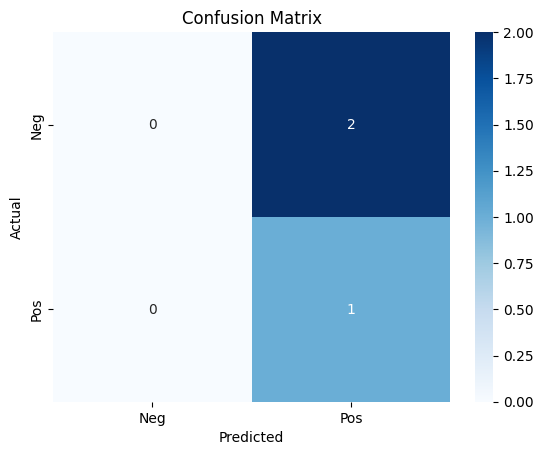

In [15]:
# Step 6: Evaluation
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
# Step 7: Key Insights
feature_names = np.array(tfidf.get_feature_names_out())
coefs = model.coef_[0]

top_pos = feature_names[np.argsort(coefs)[-5:]]
top_neg = feature_names[np.argsort(coefs)[:5]]

print("🔵 Top Positive Words:", top_pos)
print("🔴 Top Negative Words:", top_neg)


🔵 Top Positive Words: ['amaz' 'absolut' 'love' 'movi' 'fantast']
🔴 Top Negative Words: ['aw' 'experi' 'made' 'sens' 'wast']
